## [Online tutorial](https://quantpy.com.au/weather-derivatives/introduction-to-temperature-options/)

## Background 

## Terminology of Degree of Days

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temps = np.random.normal(65, 5, 92) # mean = 65, std = 5, days = 92
HDD_p = np.maximum(0, 65 - temps) # HDD is the maximum of 0 or 65 - temps
CDD_p = np.maximum(0, temps - 65) # CDD is the maximum of 0 or temps- 65

df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, \
                 index=range(1, len(temps)+1), \
                 columns=['Avg Temp', 'HDD', 'CDD'])

df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum())

round(df, 2)

,Avg Temp,HDD,CDD
1,51.13,13.87,0.00
2,68.06,0.00,3.06
3,67.17,0.00,2.17
4,71.61,0.00,6.61
5,66.96,0.00,1.96
...,...,...,...
89,66.89,0.00,1.89
90,65.11,0.00,0.11
91,68.80,0.00,3.80
92,63.73,1.27,0.00


---
## Traded Products 

Futures contracts on monthly cumulative degree days have been introduced by the CME.

But traded volumes are small. 

## We will be considering contracts that trade in the OTC market. We standardize our notation to refer to other reference temperatures instead of only 65 degrees fahrenheit. 

### Typical Seasons OTC

- CDD Season: 15-May to 15-Sep

- HDD Season: 15-Dec(Nov) to 15-Mar


### Popular Payoff Functions 

- ### Payoff function is the minium between cap C and the product of alpha and degree days minus some kind of strike 

In [4]:
alpha = 5000
beta = 5000
Kc = 750
Kp = 550
C = 5e5
F = 1e6

DD = np.arange(200, 1000, 10)
call = np.minimum(alpha*np.maximum(DD-Kc,0), C)
put = np.minimum(alpha*np.maximum(Kp-DD,0), F)
collar = call - put

### Example:

Cruises suffer with reduced summer sales when there are extremely hot spring weather. To hedge risk the company buys an out of the money call options on Spring CDD's, possibly with a cap because the business will sell a minimum number of cruises no matter what. 

Thes strike is 750, for any DD higher than that ... 

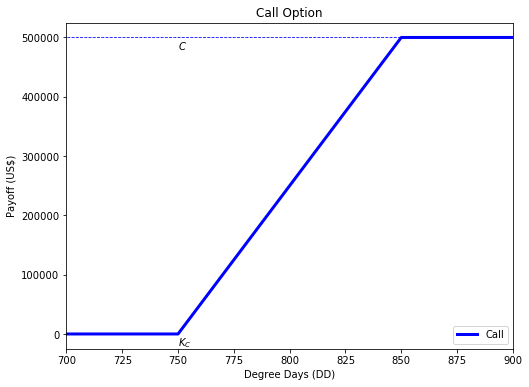

In [5]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200,1000], [C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_C$')
plt.xlim([700,900])

plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()

## Put with Floor

### Example: To hedge risk that a warm winter decreases sales revenue from a gas company, they may choose to buy a put on HDD's over the winter season. 

The strike is 550, for any DD lower than that ...

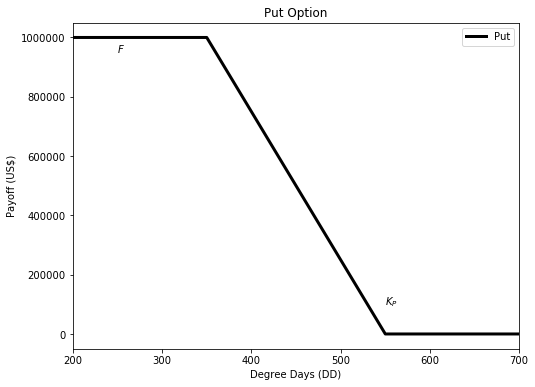

In [6]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, put, 'k', linewidth=3, label='Put')

plt.text(250, F-5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_P$')
plt.xlim([200,700])

plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()

## Collar 

### Example: to hedge revenues against a mild winter, a gas company could enter into a zero dollar collar contract (no up-front cost) that pays the writer if the winter is cold and receives payment if the winter is warm. 

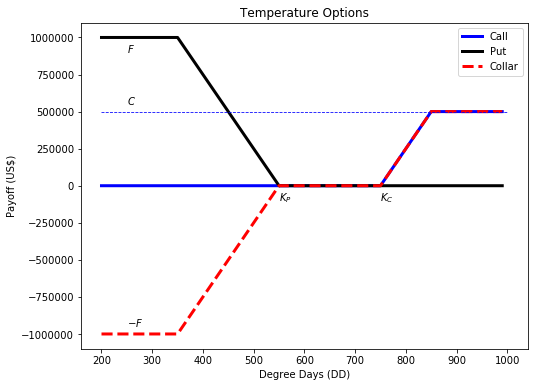

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200,1000], [C,C], 'b--', linewidth=0.8)

plt.text(250, C+.5e5, r'$C$')
plt.text(250, F-1e5, r'$F$')
plt.text(250, -F+.5e5, r'$-F$')

plt.text(Kc, -.1e6, r'$K_C$')
plt.text(Kp, -.1e6, r'$K_P$')

plt.title('Temperature Options')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()